In [1]:
#Versão 1.1 - 16/05/2022 -
#Analista : Vinícius Brum
#Departamento > Análista de dados e BI
#Status: Concluido

# Análise exploratória de dados e estratégia de marketing Super Store

## Empresa: SuperStore
Problema: Entender quais produtos, regiões, categorias e segmentos de clientes eles devem evitar ou sermentar.
Estratégia do negócio: Focar em locais e segmento de clientes lucrativos


Perguntas que devo responder:
 1) Quais são as variáveis que temos para explorar?
 2) Quantos pedidos no total?
 3) Qual tipo de entrega que sai mais? Depende da região?
 4) Qual situação atual da empresa ? Vendas e Lucro
 5) Em quais segmentos e tipos de produtos temos mais demanda? Quantos de cada um? Em quais temos menos?
 6) Para quais países nos vendemos?
 7) Quantos pedidos por região?
 8) Quais são as categorias com mais vendas? E as que possuem menos vendas?
 9) Das top categorias, quais são as subcategorias mais relevantes? E quais são menos relevantes?
 10) Qual região e cidade pussuimos mais vendas? Quais possuem menos vendas?
 11) Existe algum tipo de cliente que seja mais lucrativo?
 12) Quem são nossos melhores clientes? Existe alguma caracteristica em comum?
 13) Diagnóstico da empresa - Plano de Ação e Recomendações


Quais soluções posso trazer com dados?
    1) Como vou entregar? Iniciar a entrega do trabalho a partir de um E-Mail e na sequência uma apresentação com os principais achados
    2) Onde estão os dados? Os dados estão em um CSV na máquina local
      
    

# Respostas
### 1) Quais são as variáveis que temos para explorar?
Número de colunas -1

### 2) Quantos pedidos no total?
Número de pedidos únicos que temos na tabela

### 3)Qual tipo de entrega que sai mais? Depende da região?
Número de entregas totais filtrado pelo tipo de entrega e região
Agrupar a quantidade de pedidos somada por entrega 

###  4) Qual situação atual da empresa ? Vendas e Lucro
Trazer a evolução de vendas e lucros segmentado por mes

### 5) Em quais segmentos e tipos de produtos temos mais demanda? Quantos de cada um? Em quais temos menos?
Tabela com segmentos e pedidos, ordenada pelo número de pedidos

###  6) Para quais países nos vendemos?
Soma do número de vendas segmentada pelo país, ordenar por número de pedidos desc

###  7) Quantos pedidos por região? E o Lucro?
Número de pedidos totais/Lucros segmentado pelas regiões, ordenar por número de pedidos desc

### 8) Quais são as categorias com mais vendas? E as que possuem menos vendas?
Total de vendas segmentado pelas categorias, ordenada por pedidos asc e desc
### 9) Das top categorias, quais são as subcategorias mais relevantes? E quais são menos relevantes?
Filtrar a tabela com as TOP categorias, depois granular para sub-categorias (agrupamento). Contar o número de pedidos por sub-categorias

### 10)Qual região e cidade pussuimos mais vendas? Quais possuem menos vendas?
Somar número de vendas e agrupar por região e cidade. Mostrar o head e o tail

### 11) Existe algum tipo de cliente que seja mais lucrativo?
Análise de RFM
Análise de LTV
Quais são os TOP clientes lucrativos?

### 12) Quem são nossos melhores clientes? Existe alguma caracteristica em comum?
Criar uma lista de clientes lucrativos
Comparar algumas variáveis entre eles com o resto - Quais os produtos mais comuns que eles compram? Qual o tiket médio? Vivem em alguma região especifica? 





# 0.Bibliotecas 📖 

In [2]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import math
import plotly_express as px

#datas
import datetime as dt
import time
from datetime import date
from datetime import datetime,date,time

%matplotlib inline

# 1.Importando os dados 🎲

In [3]:
data_source= pd.read_csv("Sample - Superstore old.csv", encoding='ISo-8859-1')
#Dados sem filtragem e sem manipulação             

In [4]:
data_source.head(500)

,Row ID,Order ID,Order Date,Ship Date,Ship Mode,Customer ID,Customer Name,Segment,Country,City,...,Postal Code,Region,Product ID,Category,Sub-Category,Product Name,Sales,Quantity,Discount,Profit
0,1,CA-2016-152156,11/8/2016,11/11/2016,Second Class,CG-12520,Claire Gute,Consumer,United States,Henderson,...,42420,South,FUR-BO-10001798,Furniture,Bookcases,Bush Somerset Collection Bookcase,261.9600,2,0.00,41.9136
1,2,CA-2016-152156,11/8/2016,11/11/2016,Second Class,CG-12520,Claire Gute,Consumer,United States,Henderson,...,42420,South,FUR-CH-10000454,Furniture,Chairs,"Hon Deluxe Fabric Upholstered Stacking Chairs,...",731.9400,3,0.00,219.5820
2,3,CA-2016-138688,6/12/2016,6/16/2016,Second Class,DV-13045,Darrin Van Huff,Corporate,United States,Los Angeles,...,90036,West,OFF-LA-10000240,Office Supplies,Labels,Self-Adhesive Address Labels for Typewriters b...,14.6200,2,0.00,6.8714
3,4,US-2015-108966,10/11/2015,10/18/2015,Standard Class,SO-20335,Sean O'Donnell,Consumer,United States,Fort Lauderdale,...,33311,South,FUR-TA-10000577,Furniture,Tables,Bretford CR4500 Series Slim Rectangular Table,957.5775,5,0.45,-383.0310
4,5,US-2015-108966,10/11/2015,10/18/2015,Standard Class,SO-20335,Sean O'Donnell,Consumer,United States,Fort Lauderdale,...,33311,South,OFF-ST-10000760,Office Supplies,Storage,Eldon Fold 'N Roll Cart System,22.3680,2,0.20,2.5164
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
495,496,CA-2015-134782,12/27/2015,12/31/2015,Standard Class,MD-17350,Maribeth Dona,Consumer,United States,Fayetteville,...,72701,South,OFF-EN-10001434,Office Supplies,Envelopes,"Strathmore #10 Envelopes, Ultimate White",105.4200,2,0.00,51.6558
496,497,CA-2016-126158,7/25/2016,7/31/2016,Standard Class,SC-20095,Sanjit Chand,Consumer,United States,Costa Mesa,...,92627,West,OFF-BI-10002498,Office Supplies,Binders,Clear Mylar Reinforcing Strips,119.6160,8,0.20,40.3704
497,498,CA-2016-126158,7/25/2016,7/31/2016,Standard Class,SC-20095,Sanjit Chand,Consumer,United States,Costa Mesa,...,92627,West,FUR-FU-10004864,Furniture,Furnishings,"Howard Miller 14-1/2"" Diameter Chrome Round Wa...",255.7600,4,0.00,81.8432
498,499,CA-2016-126158,7/25/2016,7/31/2016,Standard Class,SC-20095,Sanjit Chand,Consumer,United States,Costa Mesa,...,92627,West,FUR-CH-10002602,Furniture,Chairs,DMI Arturo Collection Mission-style Design Woo...,241.5680,2,0.20,18.1176


In [5]:
data = data_source.copy()
#copia para manipulação

# 2.Exploração dos dados 🔍

In [6]:
#Tamanho da tabela
data.shape
#Linhas,Colunas

(9994, 21)

In [7]:
data.columns

Index(['Row ID', 'Order ID', 'Order Date', 'Ship Date', 'Ship Mode',
       'Customer ID', 'Customer Name', 'Segment', 'Country', 'City', 'State',
       'Postal Code', 'Region', 'Product ID', 'Category', 'Sub-Category',
       'Product Name', 'Sales', 'Quantity', 'Discount', 'Profit'],
      dtype='object')

In [8]:
data.dtypes
#Vou precisar converter Order Date,Ship Date,Sales,Quantity,Discount,Profit

Row ID             int64
Order ID          object
Order Date        object
Ship Date         object
Ship Mode         object
Customer ID       object
Customer Name     object
Segment           object
Country           object
City              object
State             object
Postal Code        int64
Region            object
Product ID        object
Category          object
Sub-Category      object
Product Name      object
Sales            float64
Quantity           int64
Discount         float64
Profit           float64
dtype: object

In [9]:
#column = ['Quantity', 'Discount', 'Sales', 'Profit']
#data['Quantity'] = pd.to_numeric(data['Quantity'], errors='coerce')
#data['Discount'] = pd.to_numeric(data['Discount'], errors='coerce')
#data['Sales'] = pd.to_numeric(data['Sales'], errors='coerce')
#data['Profit'] = pd.to_numeric(data['Profit'], errors='coerce')

In [10]:
data.dtypes


Row ID             int64
Order ID          object
Order Date        object
Ship Date         object
Ship Mode         object
Customer ID       object
Customer Name     object
Segment           object
Country           object
City              object
State             object
Postal Code        int64
Region            object
Product ID        object
Category          object
Sub-Category      object
Product Name      object
Sales            float64
Quantity           int64
Discount         float64
Profit           float64
dtype: object

In [11]:
#Checar numeros nulos no order ID
data.isnull().sum()

Row ID           0
Order ID         0
Order Date       0
Ship Date        0
Ship Mode        0
Customer ID      0
Customer Name    0
Segment          0
Country          0
City             0
State            0
Postal Code      0
Region           0
Product ID       0
Category         0
Sub-Category     0
Product Name     0
Sales            0
Quantity         0
Discount         0
Profit           0
dtype: int64

In [12]:
data.describe()

,Row ID,Postal Code,Sales,Quantity,Discount,Profit
count,9994.000000,9994.000000,9994.000000,9994.000000,9994.000000,9994.000000
mean,4997.500000,55190.379428,229.858001,3.789574,0.156203,28.656896
std,2885.163629,32063.693350,623.245101,2.225110,0.206452,234.260108
min,1.000000,1040.000000,0.444000,1.000000,0.000000,-6599.978000
25%,2499.250000,23223.000000,17.280000,2.000000,0.000000,1.728750
50%,4997.500000,56430.500000,54.490000,3.000000,0.200000,8.666500
75%,7495.750000,90008.000000,209.940000,5.000000,0.200000,29.364000
max,9994.000000,99301.000000,22638.480000,14.000000,0.800000,8399.976000


In [13]:
#Encontrar cliente com lucro negativo
#Venda de 44 centavos
#analisar percentil 90% de vendas
#checar quem está recebendo recebendo desconto alto - Acima de 70%

In [14]:
data[data['Profit']==data['Profit'].min()]

,Row ID,Order ID,Order Date,Ship Date,Ship Mode,Customer ID,Customer Name,Segment,Country,City,...,Postal Code,Region,Product ID,Category,Sub-Category,Product Name,Sales,Quantity,Discount,Profit
7772,7773,CA-2016-108196,11/25/2016,12/2/2016,Standard Class,CS-12505,Cindy Stewart,Consumer,United States,Lancaster,...,43130,East,TEC-MA-10000418,Technology,Machines,Cubify CubeX 3D Printer Double Head Print,4499.985,5,0.7,-6599.978


In [15]:
data[data['Sales']==data['Sales'].min()]

,Row ID,Order ID,Order Date,Ship Date,Ship Mode,Customer ID,Customer Name,Segment,Country,City,...,Postal Code,Region,Product ID,Category,Sub-Category,Product Name,Sales,Quantity,Discount,Profit
4101,4102,US-2017-102288,6/19/2017,6/23/2017,Standard Class,ZC-21910,Zuschuss Carroll,Consumer,United States,Houston,...,77095,Central,OFF-AP-10002906,Office Supplies,Appliances,Hoover Replacement Belt for Commercial Guardsm...,0.444,1,0.8,-1.11


In [16]:
data[data['Sales']>=data['Sales'].quantile(0.97)].sort_values('Sales',ascending =False).head(20)

,Row ID,Order ID,Order Date,Ship Date,Ship Mode,Customer ID,Customer Name,Segment,Country,City,...,Postal Code,Region,Product ID,Category,Sub-Category,Product Name,Sales,Quantity,Discount,Profit
2697,2698,CA-2014-145317,3/18/2014,3/23/2014,Standard Class,SM-20320,Sean Miller,Home Office,United States,Jacksonville,...,32216,South,TEC-MA-10002412,Technology,Machines,Cisco TelePresence System EX90 Videoconferenci...,22638.480,6,0.5,-1811.0784
6826,6827,CA-2016-118689,10/2/2016,10/9/2016,Standard Class,TC-20980,Tamara Chand,Corporate,United States,Lafayette,...,47905,Central,TEC-CO-10004722,Technology,Copiers,Canon imageCLASS 2200 Advanced Copier,17499.950,5,0.0,8399.9760
8153,8154,CA-2017-140151,3/23/2017,3/25/2017,First Class,RB-19360,Raymond Buch,Consumer,United States,Seattle,...,98115,West,TEC-CO-10004722,Technology,Copiers,Canon imageCLASS 2200 Advanced Copier,13999.960,4,0.0,6719.9808
2623,2624,CA-2017-127180,10/22/2017,10/24/2017,First Class,TA-21385,Tom Ashbrook,Home Office,United States,New York City,...,10024,East,TEC-CO-10004722,Technology,Copiers,Canon imageCLASS 2200 Advanced Copier,11199.968,4,0.2,3919.9888
4190,4191,CA-2017-166709,11/17/2017,11/22/2017,Standard Class,HL-15040,Hunter Lopez,Consumer,United States,Newark,...,19711,East,TEC-CO-10004722,Technology,Copiers,Canon imageCLASS 2200 Advanced Copier,10499.970,3,0.0,5039.9856
9039,9040,CA-2016-117121,12/17/2016,12/21/2016,Standard Class,AB-10105,Adrian Barton,Consumer,United States,Detroit,...,48205,Central,OFF-BI-10000545,Office Supplies,Binders,GBC Ibimaster 500 Manual ProClick Binding System,9892.740,13,0.0,4946.3700
4098,4099,CA-2014-116904,9/23/2014,9/28/2014,Standard Class,SC-20095,Sanjit Chand,Consumer,United States,Minneapolis,...,55407,Central,OFF-BI-10001120,Office Supplies,Binders,Ibico EPK-21 Electric Binding System,9449.950,5,0.0,4630.4755
4277,4278,US-2016-107440,4/16/2016,4/20/2016,Standard Class,BS-11365,Bill Shonely,Corporate,United States,Lakewood,...,8701,East,TEC-MA-10001047,Technology,Machines,"3D Systems Cube Printer, 2nd Generation, Magenta",9099.930,7,0.0,2365.9818
8488,8489,CA-2016-158841,2/2/2016,2/4/2016,Second Class,SE-20110,Sanjit Engle,Consumer,United States,Arlington,...,22204,South,TEC-MA-10001127,Technology,Machines,HP Designjet T520 Inkjet Large Format Printer ...,8749.950,5,0.0,2799.9840
6425,6426,CA-2016-143714,5/23/2016,5/27/2016,Standard Class,CC-12370,Christopher Conant,Consumer,United States,Philadelphia,...,19120,East,TEC-CO-10004722,Technology,Copiers,Canon imageCLASS 2200 Advanced Copier,8399.976,4,0.4,1119.9968


In [17]:
data[data['Discount']>=0.7].sort_values('Discount',ascending =False).head(20)

#Sugestão para análise : Criar um gráfico de Desconto x Lucro

,Row ID,Order ID,Order Date,Ship Date,Ship Mode,Customer ID,Customer Name,Segment,Country,City,...,Postal Code,Region,Product ID,Category,Sub-Category,Product Name,Sales,Quantity,Discount,Profit
14,15,US-2015-118983,11/22/2015,11/26/2015,Standard Class,HP-14815,Harold Pawlan,Home Office,United States,Fort Worth,...,76106,Central,OFF-AP-10002311,Office Supplies,Appliances,Holmes Replacement Filter for HEPA Air Cleaner...,68.810,5,0.8,-123.8580
2527,2528,CA-2015-124541,4/6/2015,4/10/2015,Standard Class,TT-21220,Thomas Thornton,Consumer,United States,Houston,...,77041,Central,OFF-BI-10004209,Office Supplies,Binders,"Fellowes Twister Kit, Gray/Clear, 3/pkg",9.648,6,0.8,-16.8840
7946,7947,CA-2017-134194,12/25/2017,1/1/2018,Standard Class,GA-14725,Guy Armstrong,Consumer,United States,Dallas,...,75081,Central,OFF-BI-10001116,Office Supplies,Binders,"Wilson Jones 1"" Hanging DublLock Ring Binders",3.168,3,0.8,-5.0688
3894,3895,US-2014-112200,11/22/2014,11/28/2014,Standard Class,TC-21475,Tony Chapman,Home Office,United States,Bolingbrook,...,60440,Central,OFF-BI-10002571,Office Supplies,Binders,"Avery Framed View Binder, EZD Ring (Locking), ...",9.980,5,0.8,-16.4670
3885,3886,US-2017-127341,1/29/2017,2/2/2017,Standard Class,CK-12595,Clytie Kelty,Consumer,United States,Chicago,...,60653,Central,OFF-BI-10001072,Office Supplies,Binders,"GBC Clear Cover, 8-1/2 x 11, unpunched, 25 cov...",12.128,4,0.8,-20.6176
3855,3856,US-2017-105389,10/23/2017,10/28/2017,Second Class,DM-13015,Darrin Martin,Consumer,United States,San Antonio,...,78207,Central,OFF-BI-10004364,Office Supplies,Binders,Storex Dura Pro Binders,3.564,3,0.8,-6.2370
3852,3853,CA-2017-130526,11/26/2017,11/29/2017,First Class,GT-14755,Guy Thornton,Consumer,United States,Rockford,...,61107,Central,OFF-BI-10001524,Office Supplies,Binders,GBC Premium Transparent Covers with Diagonal L...,33.568,8,0.8,-53.7088
3764,3765,CA-2017-125878,2/25/2017,3/2/2017,Standard Class,MH-18025,Michelle Huthwaite,Consumer,United States,Chicago,...,60623,Central,OFF-BI-10002609,Office Supplies,Binders,Avery Hidden Tab Dividers for Binding Systems,1.788,3,0.8,-3.0396
3708,3709,CA-2014-120544,11/23/2014,11/27/2014,Standard Class,SS-20140,Saphhira Shifley,Corporate,United States,Mesquite,...,75150,Central,OFF-AP-10004336,Office Supplies,Appliances,Conquest 14 Commercial Heavy-Duty Upright Vacu...,34.176,3,0.8,-87.1488
8021,8022,CA-2014-129189,7/21/2014,7/25/2014,Standard Class,HM-14860,Harry Marie,Corporate,United States,Dallas,...,75217,Central,OFF-AP-10000124,Office Supplies,Appliances,Acco 6 Outlet Guardian Basic Surge Suppressor,4.992,3,0.8,-12.9792


# 3. Limpeza dos Dados 🧹

In [18]:
#Remover colunas Row ID
data.drop('Row ID', axis=1, inplace=True)

In [19]:
#Criar coluna de Mês e Ano
data['order_month']= pd.to_datetime(data['Order Date']).dt.to_period('m')
#Criar coluna de Mês e Ano
data['order_year']= pd.to_datetime(data['Order Date']).dt.to_period('y')

In [20]:
data.dtypes

Order ID                object
Order Date              object
Ship Date               object
Ship Mode               object
Customer ID             object
Customer Name           object
Segment                 object
Country                 object
City                    object
State                   object
Postal Code              int64
Region                  object
Product ID              object
Category                object
Sub-Category            object
Product Name            object
Sales                  float64
Quantity                 int64
Discount               float64
Profit                 float64
order_month          period[M]
order_year       period[A-DEC]
dtype: object

# 4. Respondendo os problemas de negócio

In [21]:
#1) Quais são as variáveis que temos para explorar?
#Número de colunas -1

variaveis = data.shape[1]-1
print (variaveis)

21


In [22]:
#2) Quantos pedidos no total?
#Número de pedidos únicos que temos na tabela
data["Order ID"].unique().shape

(5009,)

In [23]:
#3)Qual tipo de entrega que sai mais? Depende da região?
#Número de entregas totais filtrado pelo tipo de entrega e região Agrupar a quantidade de pedidos somada por entrega
data['Ship Mode'].unique()

array(['Second Class', 'Standard Class', 'First Class', 'Same Day'],
      dtype=object)

In [24]:
#O mesmo order ID tem o mesmo tipo de shipping?
order_unicas = len(data["Order ID"].unique())
print (order_unicas)

5009


In [25]:
linhas_unicas = len(data[['Order ID','Ship Mode']].drop_duplicates())
print (linhas_unicas)

5009


In [26]:
data.groupby('Ship Mode').count()

,Order ID,Order Date,Ship Date,Customer ID,Customer Name,Segment,Country,City,State,Postal Code,...,Product ID,Category,Sub-Category,Product Name,Sales,Quantity,Discount,Profit,order_month,order_year
Ship Mode,,,,,,,,,,,,,,,,,,,,,
First Class,1538,1538,1538,1538,1538,1538,1538,1538,1538,1538,...,1538,1538,1538,1538,1538,1538,1538,1538,1538,1538
Same Day,543,543,543,543,543,543,543,543,543,543,...,543,543,543,543,543,543,543,543,543,543
Second Class,1945,1945,1945,1945,1945,1945,1945,1945,1945,1945,...,1945,1945,1945,1945,1945,1945,1945,1945,1945,1945
Standard Class,5968,5968,5968,5968,5968,5968,5968,5968,5968,5968,...,5968,5968,5968,5968,5968,5968,5968,5968,5968,5968


In [27]:
data[['Order ID','Ship Mode']].drop_duplicates().groupby('Ship Mode').count()

,Order ID
Ship Mode,
First Class,787
Same Day,264
Second Class,964
Standard Class,2994


In [28]:
#4) Qual situação atual da empresa ? Vendas e Lucro
#Vamos agrupar o faturamento da empresa por mes
data.groupby('order_month').sum()["Sales"]

order_month
2014-01     14236.8950
2014-02      4519.8920
2014-03     55691.0090
2014-04     28295.3450
2014-05     23648.2870
2014-06     34595.1276
2014-07     33946.3930
2014-08     27909.4685
2014-09     81777.3508
2014-10     31453.3930
2014-11     78628.7167
2014-12     69545.6205
2015-01     18174.0756
2015-02     11951.4110
2015-03     38726.2520
2015-04     34195.2085
2015-05     30131.6865
2015-06     24797.2920
2015-07     28765.3250
2015-08     36898.3322
2015-09     64595.9180
2015-10     31404.9235
2015-11     75972.5635
2015-12     74919.5212
2016-01     18542.4910
2016-02     22978.8150
2016-03     51715.8750
2016-04     38750.0390
2016-05     56987.7280
2016-06     40344.5340
2016-07     39261.9630
2016-08     31115.3743
2016-09     73410.0249
2016-10     59687.7450
2016-11     79411.9658
2016-12     96999.0430
2017-01     43971.3740
2017-02     20301.1334
2017-03     58872.3528
2017-04     36521.5361
2017-05     44261.1102
2017-06     52981.7257
2017-07     45264.4160

<AxesSubplot:xlabel='order_month'>

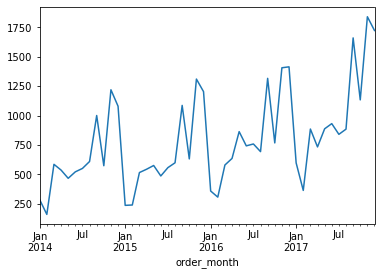

In [29]:
data.groupby('order_month').sum()["Quantity"].plot()

<AxesSubplot:xlabel='order_year'>

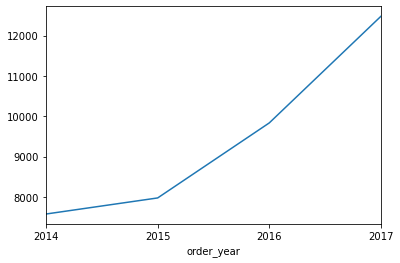

In [30]:
data.groupby('order_year').sum()["Quantity"].plot()

<AxesSubplot:xlabel='order_year'>

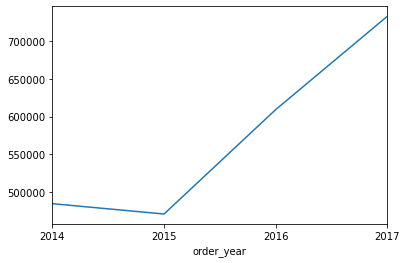

In [31]:
data.groupby('order_year').sum()["Sales"].plot()

<AxesSubplot:xlabel='order_year'>

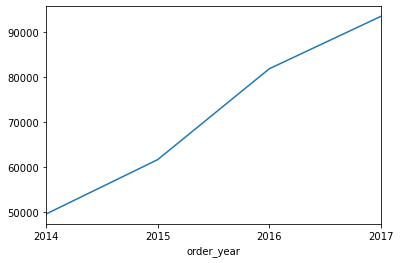

In [32]:
data.groupby('order_year').sum()["Profit"].plot()

<AxesSubplot:xlabel='order_month'>

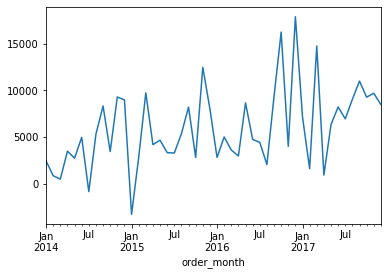

In [33]:
data.groupby('order_month').sum()["Profit"].plot()

# 5) Em quais segmentos e tipos de produtos temos mais demanda? Quantos de cada um? Em quais temos menos?

In [34]:
data.groupby('Segment').sum()["Profit"]

Segment
Consumer       134119.2092
Corporate       91979.1340
Home Office     60298.6785
Name: Profit, dtype: float64

In [35]:
#Qual lucro por pedido médio


data.groupby('Segment').sum()["Profit"]/data.groupby('Segment').sum()["Quantity"]

Segment
Consumer       6.870509
Corporate      7.923771
Home Office    8.941085
dtype: float64

###  6) Para quais países nos vendemos?

In [36]:
data.groupby('Country').sum()["Profit"]

Country
United States    286397.0217
Name: Profit, dtype: float64

###  7) Quantos pedidos por região? E o Lucro?


<AxesSubplot:xlabel='Region'>

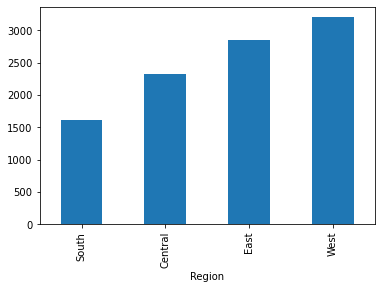

In [37]:
data.groupby('Region').count()["Order ID"].sort_values().plot.bar()

<AxesSubplot:xlabel='Region'>

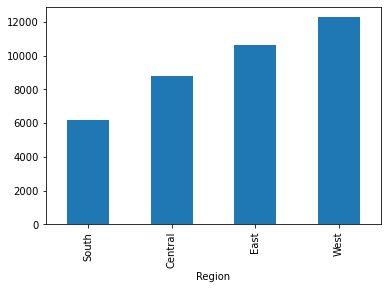

In [38]:
data.groupby('Region').sum()["Quantity"].sort_values().plot.bar()

<AxesSubplot:xlabel='order_year'>

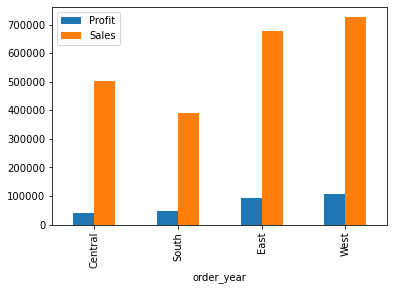

In [42]:
data.groupby('Region').sum()[["Profit","Sales"]].sort_values(by="Profit").plot.bar

In [45]:
data.groupby(["order_year",'Region']).sum()["Sales"]

order_year  Region 
2014        Central    103838.1646
            East       128680.4570
            South      103845.8435
            West       147883.0330
2015        Central    102874.2220
            East       156332.0570
            South       71359.9805
            West       139966.2495
2016        Central    147429.3760
            East       180685.8220
            South       93610.2235
            West       187480.1765
2017        Central    147098.1282
            East       213082.9040
            South      122905.8575
            West       250128.3655
Name: Sales, dtype: float64

<AxesSubplot:xlabel='order_year'>

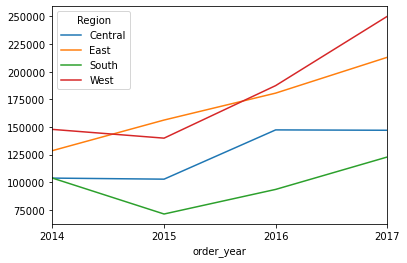

In [43]:
data.groupby(["order_year",'Region']).sum()["Sales"].unstack().plot(xlabel="order_year")

# Perguntas sobre as Categorias de produtos

In [ ]:
#Qual minha finalidade? Elaborar uma estratégia de marketing
#Vamos filtrar os dados para os anos de 2016 e 17


In [63]:
data_recent=data[data["order_year"]>="2016"].sort_values("order_year")

In [64]:
data_recente.groupby("Category").sum()['Profit'].sort_values(ascending=False)

Category
Technology         90458.2486
Office Supplies    74797.8509
Furniture           9978.3444
Name: Profit, dtype: float64

In [66]:
#Categoria com mais lucro por unidade
(data_recente.groupby("Category").sum()['Profit']/data_recente.groupby("Category").sum()['Quantity']).sort_values(ascending=False)

Category
Technology         22.27487
Office Supplies     5.49096
Furniture           2.15515
dtype: float64

In [74]:
data_tech = data_recente[data_recente["Category"]=='Technology'].groupby('Sub-Category').sum()[['Quantity','Profit','Sales']].sort_values('Profit',ascending=False)

In [75]:
data_tech["Profit_per_quantity"] = data_tech['Profit']/data_tech['Quantity']

In [76]:
data_tech

,Quantity,Profit,Sales,Profit_per_quantity
Sub-Category,,,,
Copiers,142,42774.5828,112498.798,301.229456
Accessories,1761,25336.6455,101842.086,14.387647
Phones,1908,22308.9179,184302.546,11.692305
Machines,250,38.1024,99451.561,0.152410


In [ ]:
Qual estado possui mais vendas?

In [90]:
data_recente.groupby("State").sum()["Profit"].sort_values(ascending=False).head(10)

State
California    49372.1750
New York      41012.0212
Washington    21466.6555
Michigan      17480.2806
Indiana       15524.6596
Georgia        9994.4165
Virginia       9657.4876
New Jersey     7213.0952
Delaware       7029.9107
Kentucky       5968.3840
Name: Profit, dtype: float64

In [93]:
data_recente.groupby("State").sum()["Profit"].sort_values(ascending=False).tail(10)

State
Florida            -227.7465
Oregon             -942.9719
Arizona           -2761.1100
Tennessee         -3467.5906
North Carolina    -4827.6923
Colorado          -5824.9809
Pennsylvania      -9297.7975
Ohio              -9339.4223
Illinois          -9554.6539
Texas            -14078.1598
Name: Profit, dtype: float64

In [91]:
data_recente.groupby("State").sum()["Sales"].sort_values(ascending=False).head(10)

State
California      277940.2560
New York        165767.0970
Washington       85354.1800
Texas            85107.9102
Pennsylvania     75754.9500
Michigan         53253.6840
Ohio             48012.8600
Illinois         45385.3300
Indiana          43978.2300
Florida          40047.9990
Name: Sales, dtype: float64

In [94]:
data_recente.groupby("State").mean()["Discount"].sort_values(ascending=False)

State
Illinois                0.387372
Texas                   0.364673
Pennsylvania            0.334328
Colorado                0.326549
Arizona                 0.324779
Oregon                  0.321538
Ohio                    0.318089
Florida                 0.297406
Tennessee               0.291667
North Carolina          0.283648
Wyoming                 0.200000
Nevada                  0.087500
West Virginia           0.075000
California              0.073549
Utah                    0.069565
Idaho                   0.066667
Washington              0.065875
New York                0.054167
New Mexico              0.053846
Massachusetts           0.019048
Rhode Island            0.016667
Maryland                0.009677
Delaware                0.006977
New Jersey              0.006522
Michigan                0.005797
Connecticut             0.005357
South Dakota            0.000000
Vermont                 0.000000
Wisconsin               0.000000
Virginia                0.000000
Okla